# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


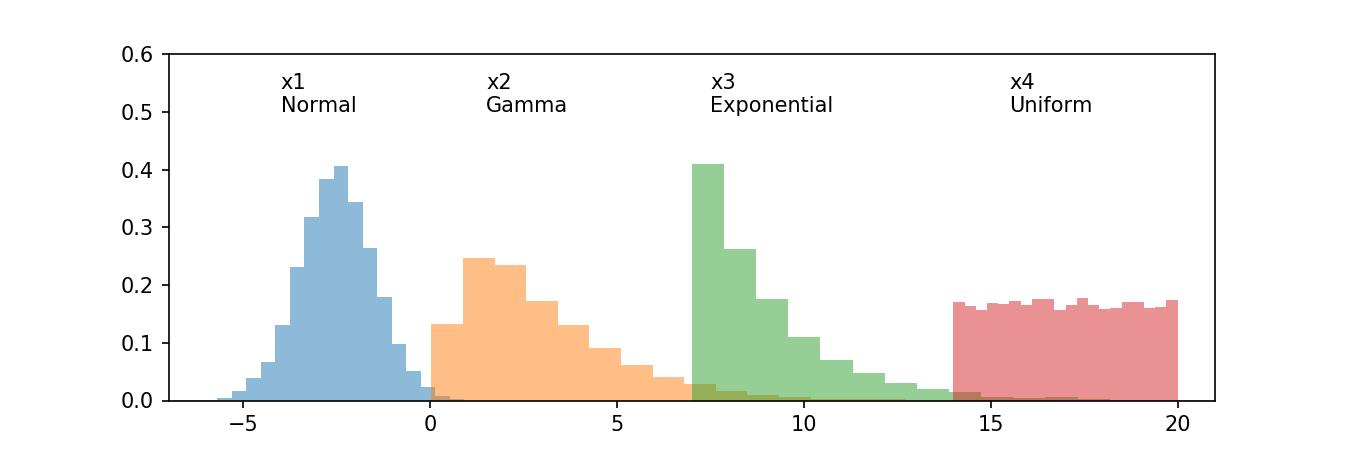

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

# Set the number of samples
n = 100

# Create array using four different samples to plot
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)


In [36]:
# Create the function to animate the plot
def animate(curr):
    # Create the grid spaecification for the subplots
    gspec = gridspec.GridSpec(2, 2)
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    # Create the first histogram using normal distribution
    normal_histogram = plt.subplot(gspec[0, 0])
    normal_histogram.cla()
    normal_histogram.hist(x1[:curr], normed=True, bins=20, alpha=0.5)
    normal_histogram.set(xlim = (-7,21),
                     ylim = (0,0.6),
                     title = 'x1 - Normal')
    normal_histogram.get_yaxis().set_animated(False)
    normal_histogram.get_xaxis().set_animated(False)
    normal_histogram.annotate('n = {}'.format(curr),[12,0.5])
    # Create the first histogram using gamma distribution 
    gamma_histogram = plt.subplot(gspec[0, 1], title = 'x2 - Gamma',sharey=normal_histogram,sharex =normal_histogram)
    gamma_histogram.hist(x2[:curr], normed=True, bins=30, alpha=0.5)
    gamma_histogram.annotate('n = {}'.format(curr),[12,0.5])
    # Create the first histogram using exponential distribution
    exp_histogram = plt.subplot(gspec[1,0], title = 'x3 - Exponential',sharey=normal_histogram,sharex =normal_histogram)
    exp_histogram.hist(x3[:curr], normed=True, bins=30, alpha=0.5)
    exp_histogram.annotate('n = {}'.format(curr),[12,0.5])
    # Create the first histogram using uniform distribution 
    uniform_histogram = plt.subplot(gspec[1,1], title = 'x4 - Uniform',sharey=normal_histogram,sharex =normal_histogram)
    uniform_histogram.hist(x4[:curr], normed=True, bins=30, alpha=0.5)
    uniform_histogram.annotate('n = {}'.format(curr),[12,0.5])

<IPython.core.display.Javascript object>


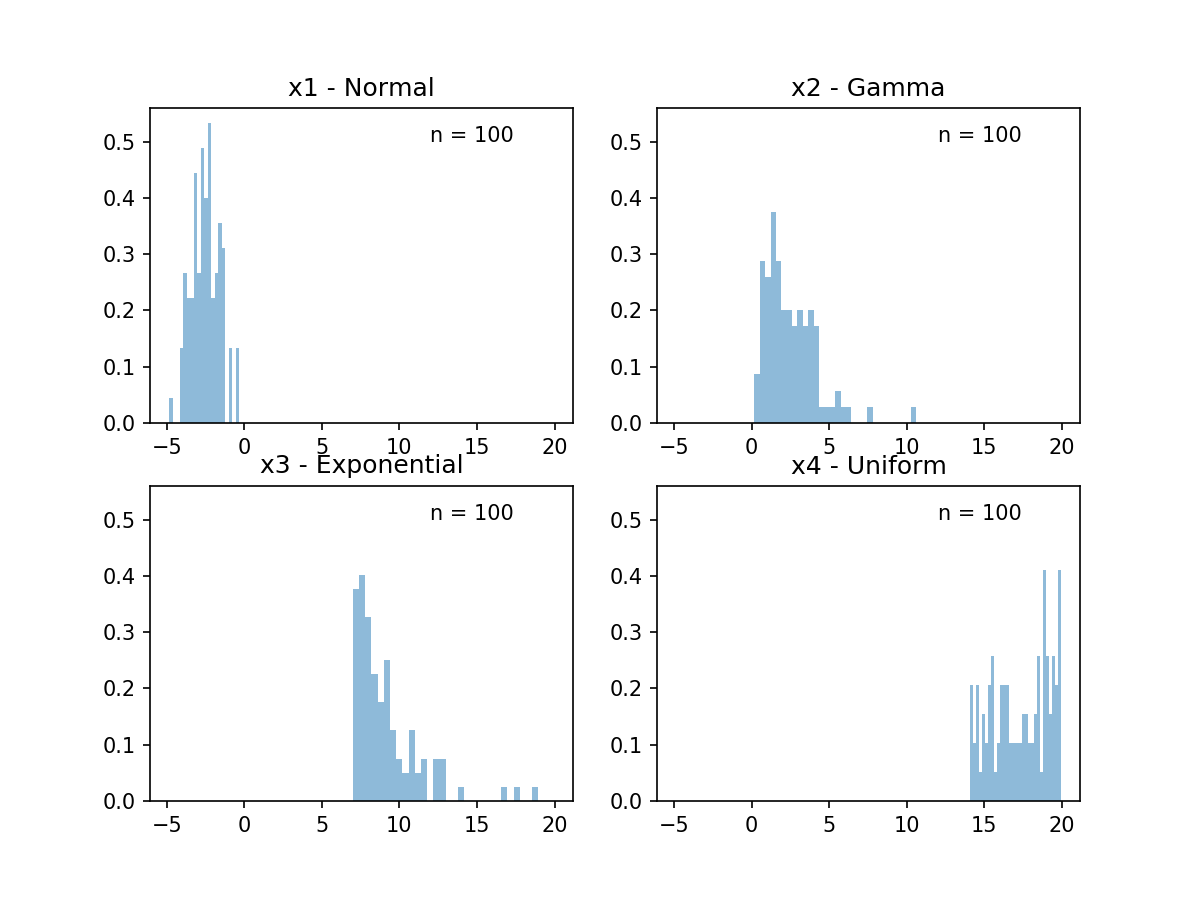

/opt/conda/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)
/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6198: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


In [37]:
fig = plt.figure(figsize=(8,6))
a = animation.FuncAnimation(fig, animate,blit=True, interval=50)
a.save('im.mp4')
plt.show()